In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
import numpy as np
import matplotlib.pyplot as plt
class lattice2d():
  
    def __init__(self,n1,n2,T,B=1,J=1):
        self.n1 = n1
        self.n2 = n2
        self.matrix = np.random.choice([-1, 1], size=(self.n1, self.n2))
        self.ham = [] 
        self.mag = []
        self.B = B
        self.J = J
        self.T = T

    # Compute the interaction between one spin and first neighbors
    def get_onepoint_interaction(self,i,j):
        interaction = - self.J * self.matrix[i,j] * (self.matrix[(i+1)%self.n1,j]+self.matrix[i-1,j]+self.matrix[i,(j+1)%self.n2]+self.matrix[i,j-1])
        return(interaction)

    def get_total_interaction(self):
        # list of pairs of adjacent sites as four-element tuples:
        # (i1, j1, i2, j2) represents two adjacent sites located
        # at (i1, j1) and (i2, j2)
        horizontal_edges = [
            (i, j-1, i, j)
            for i in range(self.n1) for j in range(self.n2)
        ]
        vertical_edges = [
            (i-1, j, i, j)
            for i in range(self.n1) for j in range(self.n2)
        ]
        # summing lists in python concatenates them
        # [1, 2, 3] + [4, 5] = [1, 2, 3, 4, 5]
        edges = horizontal_edges + vertical_edges
        E = 0
        for i1, j1, i2, j2 in edges:
            E -= self.matrix[i1,j1]*self.matrix[i2,j2]
        return E                                               


    def update_ham(self):
        # Compute the energy of interactions
        h = self.get_total_interaction()
        # Compute the energy of external field
        self.update_mag()
        h += self.B * self.mag[-1]
        self.ham.append(h)


    def update_mag(self):
        m = self.mag.append(np.sum(self.matrix))

    def flip_one_point(self, i, j):
        self.matrix[i,j] = self.matrix[i,j] * (-1)
              
    def heatmap(self):
        fig, ax = plt.subplots()
        im = ax.imshow(self.matrix, cmap = 'binary')
        plt.show()

    # deltaE -> difference btw final energy and initial energy of the single point (before and after the eventual swap)
    def metropolis(self, n_updates):
        for _ in range(n_updates):
            i = np.random.randint(self.n1)
            j = np.random.randint(self.n2)
            E_i = self.get_onepoint_interaction(i, j)
            deltaE = - 2 * self.matrix[i,j] * self.B - 2 * E_i
            if deltaE < 0:
                self.flip_one_point(i, j)
            else:
                # what is k_B???
                if np.random.uniform() < np.exp(-deltaE/self.T):
                    self.flip_one_point(i, j)

In [10]:
ising = lattice2d(5, 5, 1, 1, 1)
#ising.heatmap()

print(ising.matrix)

for _ in range(30):
    ising.metropolis(1)
    ising.update_ham()

print(ising.ham)

[[-1 -1 -1  1  1]
 [ 1 -1  1  1 -1]
 [ 1 -1 -1  1  1]
 [ 1  1 -1  1  1]
 [-1 -1 -1  1  1]]
[-9, -9, -9, -9, -15, -15, -15, -15, -15, -17, -17, -17, -17, -23, -23, -23, -21, -21, -21, -27, -29, -29, -29, -29, -29, -29, -29, -29, -27, -27]


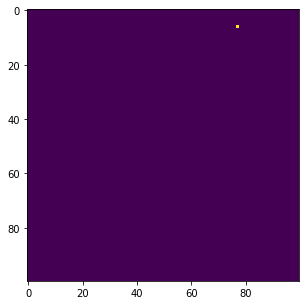

In [11]:
from IPython import display

T_c = 2/np.log(1+np.sqrt(2))
T = 4

# create initial random configuration
ising = lattice2d(100, 100, T, 100, 1)

# set up figure, plot first frame
fig, ax = plt.subplots(1, 1, figsize=(6,5))
# draw the initial configuration,
# naming the plot "im".
im = ax.imshow(ising.matrix)

for t in range(10000):
    # update the system
    ising.metropolis(10)
    # replot every 1000 MC updates
    if t%100==0:
        # update the data of the plot (not the whole figure!)
        im.set_data(ising.matrix)
        # rerender
        display.display(plt.gcf())
        display.clear_output(wait=True)